Jarak dari X ke Z: 7
Jalur: X -> E -> Z


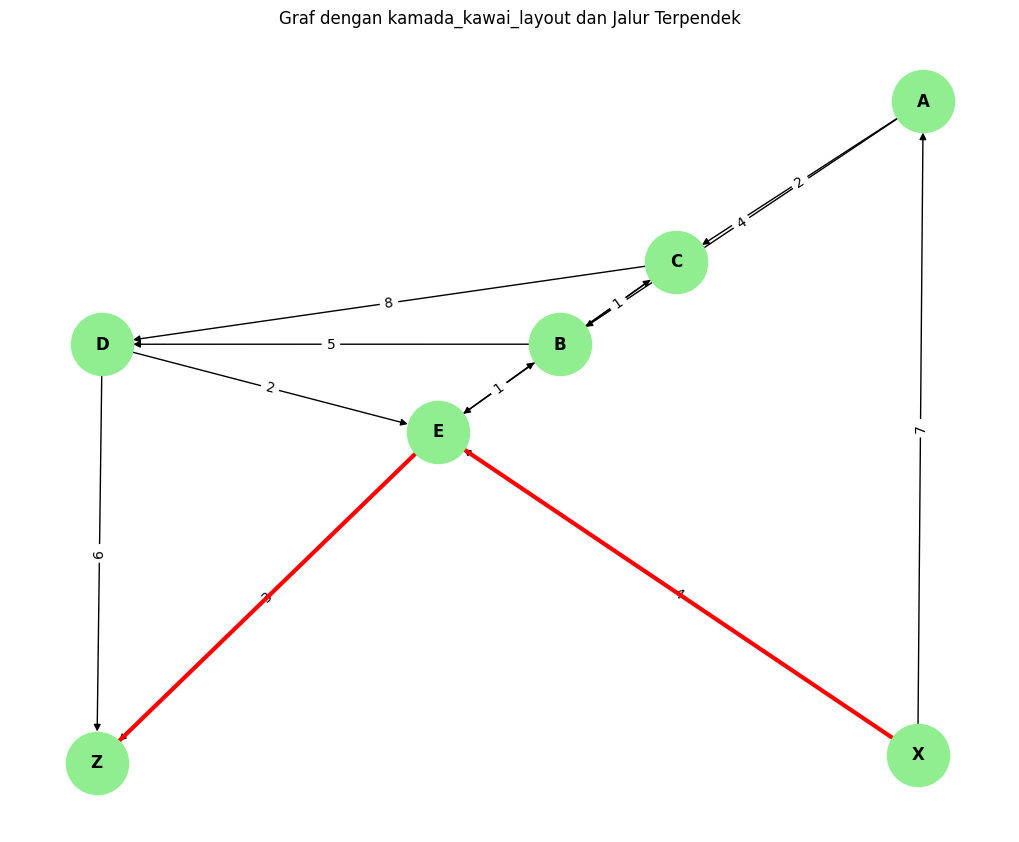

In [1]:
# struktur data graf dan algoritma
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
  distances = {node: float('inf') for node in graph}
  distances[start] = 0
  previous = {node: None for node in graph}
  queue = [(0, start)]

  while queue:
    current_distance, current_node = heapq.heappop(queue)
    for neighbor, weight in graph[current_node].items():
      distance = current_distance + weight
      if distance < distances[neighbor]:
        distances[neighbor] = distance
        previous[neighbor] = current_node
        heapq.heappush(queue, (distance, neighbor))

  return distances, previous

# merekonstruksi jalur
def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

# visualisasi (dengan kamada_kawai_layout)
def visualize_graph(graph, path=None, layout_type="kamada_kawai"):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    # Pilih tata letak
    if layout_type == "circular":
        pos = nx.circular_layout(G)
    elif layout_type == "kamada_kawai":
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Graf dengan kamada_kawai_layout dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

# MAIN PROGRAM
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3, 'B': 1},  # Siklus: E -> B (BENTUK MODIFIKASI AGAR MEMILIKI SIKLUS)
    'Z': {},
    'X': {'A': 7, 'E': 4}   # Simpul baru: X
}

start_node = 'X'
end_node = 'Z'

distances, previous = dijkstra_with_paths(graph, start_node)
shortest_path = get_path(previous, end_node)

print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' -> '.join(shortest_path)}")

visualize_graph(graph, path=shortest_path, layout_type="kamada_kawai")